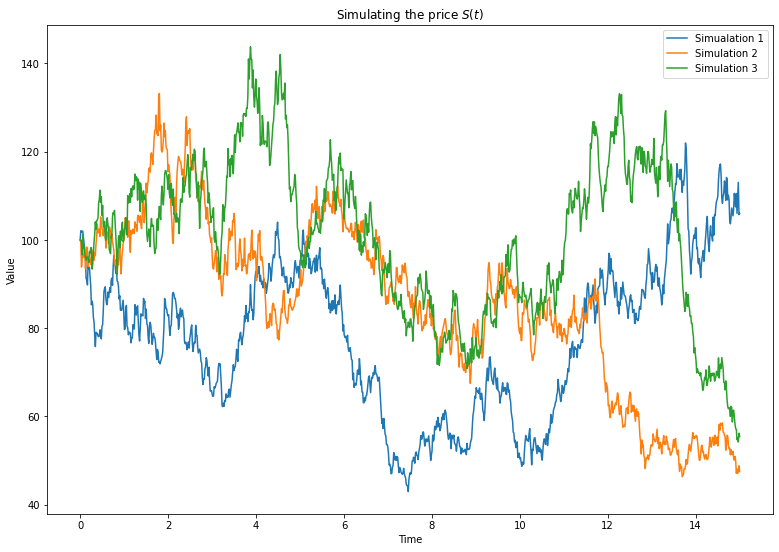

In [ ]:
# Importing the relevent liabraries 
import numpy as np
import matplotlib.pyplot as plt
# Initializing the value of S0
S0 = 100.0
# Setting the  time to T=15
T = 15.0
# Setting the risk free rate r to 0.05
r = 0.05
# setting the sigma  to 20%
sigma = 0.2
# Initializing the value of I
I = 1000
# calculating the small change in in time 
dt=T/(I+1) 
# Creating an array and assigning it tot the variable t
t=np.linspace(0,T,I)
# Creating an array of zeros ande assigning them to the vaariables St,ST1 and St2
St,St1,St2=np.zeros(I),np.zeros(I),np.zeros(I)
# setting the  first values of the arrays St,St1,St2 to S0
St[0],St1[0],St2[0]=S0,S0,S0
# Creating an array of random normal variables and assigning them to z,z1 and z2
z,z1,z2=np.random.randn(I),np.random.randn(I),np.random.randn(I)
# Creating a for loop that will iterate for 999 times
for i in range(1,1000):
  # Calculating the value of St,St1 and st2 for each iterate
  St[i] = St[i-1] * np.exp((-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z[i-1])
  St1[i] = St1[i-1] * np.exp((-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z1[i-1])
  St2[i] = St2[i-1] * np.exp((-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z2[i-1])
# Plotting the function
plt.figure(figsize=(13,9))
plt.plot(t, St)
plt.plot(t, St1)
plt.plot(t,St2 )
plt.title('Simulating the price $S(t)$')
plt.xlabel('Time')
plt.ylabel('Value')

plt.legend(["Simualation 1", "Simulation 2",'Simulation 3'])

3. Use monte-carlo methods to price the option

In [ ]:
# importing the relevent liabraries
import numpy as np
from math import log,sqrt,exp
import scipy as stats

# defining a function for the monte carlo simulation 
def call_val(N,T,r,sigma,S0,k):
  # creating an empty list for pay_off
  pay_off=[]
  # creating an array z of random normal variables with mean 0 and variance 1
  z=np.random.normal(0.0,1.0,N)
  # Creating a for loop that will iterate items in the array z
  for i in z:
    # Creating the weinner processs
    wt=sqrt(T)*i
    # Calculating the values of stock for each iterate 
    St=S0*exp((r-0.5*sigma**2)*T+sigma*wt)
    # Obtaining the simulated pay-off of the put value 
    simu_pay_off= np.maximum(k-St,0)*exp(-r*T)
    # appending the values of the simulated pay_off to the empty list pay_off
    pay_off.append(simu_pay_off)
  # computing the average value  for the pay_off list  
  price_call=np.mean(pay_off)
   
  return price_call
# calling the function
p=call_val(1000000,3,0.02,0.2,50,55)
p

7.945066664659479